# Pipelines de procesamiento para variables numéricas

Una **pipeline** de datos es una construcción lógica que representa un proceso dividido en fases.

## Transformacion (Escalamiento) lineal

se usan porque los modelos de Machine Learning son eficientes en el rango [-1,1] o [0,1].

El escalamiento lineal se usa cuando los datos están uniformemente distribuidos o que los datos sean simétricos.

$$ X \text{ se transforma en } X_s \text{ (scale)} $$

Hay diferentes tipos de escalamiento (transformaciones lineales):
- **max-min**: Escalamiento en el rango [-1,1]
$$ X_s = \frac{2X-min-max}{max-min} $$

Si se quire en el rango [0,1]

$$ X_s = \frac{X-min}{max-min} $$

- **Clipping**: defino un máximo y un mínimo (puede ser arbitrario o según percentiles(Winsorizing)) . Los datos que queden por fuera se colapsan al máximo o mínimo.
- **Z-score**: Ajusta la distribución normal a otra distribución normal con promedio en cero y con desviación estandar de uno.

$$ Z = X_s = \frac{X - \mu}{\sigma} $$

La distribución normal estandarizada es la distribución normal con $$ \mu = 0 $$ y $$ \sigma = 1 $$. $$ N(0,1) $$.

Existe una tabla de "probabilidades normales estandarizadas" que me pertmite encontrar la probabilidad a la izquierda de un valor Z dado.
- **etc**...

https://interactivechaos.com/es/manual/tutorial-de-machine-learning/escalado-de-datos

### max-min

Mejor para datos uniformemente distribuidos.


### Z-score

Mejor para datos distribuidos "normalmente" (campana de gauss).


Esto dice el estandar, pero se debe validar para cada conjunto de datos en específico.

In [ ]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

https://scikit-learn.org/stable/datasets/toy_dataset.html

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

X tiene un shape de (442, 10). para nuestro estudio solo necesitamos una columna, buscamos tener un raw con shape (442, 1)

`None` indica la transformación del arreglo (newaxis)

`2` Selecciona la 3ra columna de X. bmi(body mass index)

la variable "y" es la progresión de la enfermedad.

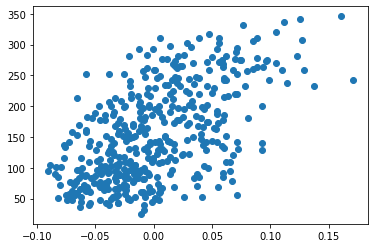

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X[:, None, 2],y)

In [ ]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [ ]:
y[0]

151.0

In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html

# Atributos
X.size # 4420
X.ndim # 2
X.shape # (442, 10)

(442, 10)

In [ ]:
# Escalamiento max - min
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw-min_raw)

# normalización Z-score
avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std
# z_scaled = (raw - raw.mean())/(raw.std())

Al entrenar un modelo el efecto del escalamiento debe ser el apropiado.
Cuando voy a hacer una regla de escalamiento debo saber cual es la distribución de mis datos **vs** la distribucion de los datos escaldos

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

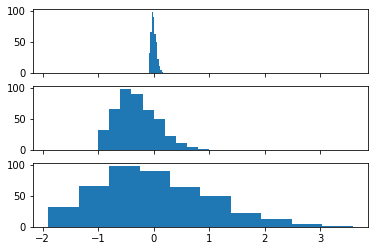

In [ ]:
fig, axs = plt.subplots(3,1, sharex = True)

axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)

In [ ]:
# Modelos para entrenamiento

def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [ ]:
raw_time = timeit.timeit(train_raw, number = 1000)
scaled_time = timeit.timeit(train_scaled, number = 1000)
z_scaled_time = timeit.timeit(train_raw, number = 1000)
print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.3724820399993405 
trainning time for scaled data : 0.3198911110002882
trainning time for z_scaled data : 0.31388229899948783


**Conclusion**: Escalar datos contribuye a que el algoritmo sea más eficiente.

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

La normalización Z se conoce como estandarización de una variable.

## Transformacion (Escalamiento) no lineal

Transformaciones cuando la distribución no es simétrica, es decir, los datos están sesgados.

Se realiza una transformación no lineal y luego se aplican escalamientos lineales.

Tipos de transformaciones no lineales:
- Logaritmos
- Sigmoide
- Polinomiales
- etc...


![](https://i.imgur.com/y5m4jtp.png)
![](https://i.imgur.com/6cqNq6h.png)

<AxesSubplot:>

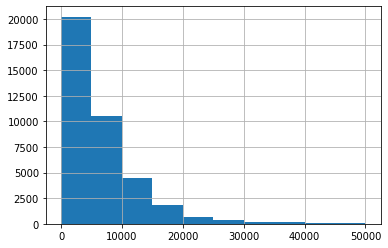

In [ ]:
df = pd.read_csv('cars.csv')

df.price_usd.hist()

<AxesSubplot:>

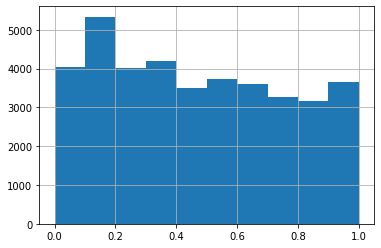

In [ ]:
p = 10000
df.price_usd.apply(lambda x : np.tanh(x/p)).hist()

* mapear datos a una distribucion gaussiana:
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b06e2ad7-2e73-4529-91c1-8e44f8b5881a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>